## HINTS 5 Cycle 3 (2019)

Health Information National Trends Survey (HINTS) is conducted by National Cancer Institute. This survey collects American public uses' of cancer information, including questions related to the source of health or medical information, whether respondent has cancer, etc. I analyze this dataset as part of the market research for the client that my company is working with. They are a prominent cancer research institution in New York. 

The goal of this notebook is to explore features that could play important roles in predicting cancer patient have cancer, whether they look for cancer information, and to segment cancer patients into different groups.



Note:

HINTS 5 Cycle 3 is updated until Jan 2020. 

Total respondents: 5,438; Complete responses: 5,247

To learn more about HINTS, please consult: https://hints.cancer.gov/about-hints/learn-more-about-hints.aspx

In [1]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

In [2]:
# read data from stata
data = pd.read_stata('hints5_cycle3_public.dta')
data.head(5)

,hhid,personid,stratum,app_region,highspanli,hispsurname,hisp_hh,ruc2003,ruc2013,pr_ruca_2010,sec_ruca_2010,sec_ruca_2010_descript,dra,treatment_h5c3,nchsurcode2013,censdiv,censreg,var_stratum,var_cluster,formtype,language_flag,qdisp,updatedate,adultsinhh,mailhhadults,seekhealthinfo,whereseekhealthinfo,wholookingfor,lotofeffort,frustrated,confidentgethealthinf,trustdoctor,trustfamily,trustgov,trustcharities,trustreligiousorgs,strongneedhealthinfo,strongneedhealthinfo_os,seekcancerinfo,useinternet,internet_dialup,internet_broadbnd,internet_cell,internet_wifi,internetcancerinfoself,whereuseinternet_home,whereuseinternet_work,whereuseinternet_publicplace,whereuseinternet_mobiledevice,electronic_selfhealthinfo,electronic_buymedicine,electronic_talkdoctor,electronic_trackedhealthcosts,electronic_testresults,electronic_madeappts,electronic_ecigharms,havedevice_tablet,havedevice_smartph,havedevice_cellph,havedevice_none,havedevice_cat,tablethealthwellnessapps,tablet_achievegoal,tablet_makedecision,tablet_discussionshcp,wearabledevtrackhealth,freqweardevtrackhealth,willingsharedata_hcp,willingsharedata_fam,otherdevtrackhealth2,sharedhealthdeviceinfo,intrsn_visitedsocnet,intrsn_sharedsocnet,intrsn_wroteblog,intrsn_supportgroup,intrsn_youtube,textfromdoctor,regularprovider,freqgoprovider,qualitycare,freqgourgentcare,qualitycareurgentcare,chanceaskquestions,feelingsaddressed,involveddecisions,understoodnextsteps,explainedclearly,spentenoughtime,helpuncertainty,healthins_insuranceemp,healthins_insurancepriv,healthins_medicare,healthins_medicaid,healthins_tricare,healthins_va,healthins_ihs,healthins_other,healthins_other_os,healthinsurance,providermaintainemr2,offeredaccesshcp2,offeredaccessinsurer2,accessonlinerecord,notaccessed_speakdirectly,notaccessed_nointernet,notaccessed_noneed,notaccessed_concernedprivacy,notaccessed_norecord,notaccessed_loginprob,notaccessed_uncomfortable,notaccessed_multiplerec,recordsonline_refillmeds,recordsonline_viewresults,recordsonline_requestcorrection,recordsonline_messagehcp,recordsonline_downloadhealth,recordsonline_addhealthinfo,recordsonline_makedecision,accessusinghealthapp,onlinerecclinnotes,esent_anotherhcp,esent_family,esent_healthapp,understandonlinemedrec,usefulonlinemedrec,caregiving_child,caregiving_spouse,caregiving_parent,caregiving_anotherfam,caregiving_friend,caregiving_no,caregivingwho_cat,caregiving_professional,caregiving_hoursperweek2,caregiving_cancer,caregiving_alzheimers,caregiving_orthomusc,caregiving_mentalhealth,caregiving_chroniccond,caregiving_neurodev,caregiving_acutecond,caregiving_aging,caregiving_notsure,caregiving_other,caregiving_other_os,caregivingcond_cat,caregiving_accessmedrec,generalhealth,ownabilitytakecarehealth,avoiddoc,deaf,talkhealthfriends,medconditions_diabetes,medconditions_highbp,medconditions_heartcondition,medconditions_lungdisease,medconditions_depression,height_feet,height_inches,weight,weightperception,weightintention,littleinterest,hopeless,nervous,worrying,changethinking,considerfuture,fruit,vegetables,averagecaloriesperday,averagecaloriesperday_dk,noticecalorieinfoonmenu,understandcalorieinfo,calorieinfo_fewercalories,calorieinfo_morecalories,calorieinfo_feweritems,calorieinfo_smallersizes,calorieinfo_moreitems,calorieinfo_largersizes,drinkdaysperweek,drinksperday,alcoholconditions_cancer,alcoholconditions_heartdisease,alcoholconditions_diabetes,alcoholconditions_liverdisease,hcpalcoholconsequences,timesmoderateexercise,howlongmoderateexerciseminutes,timesstrengthtraining,averagetimesitting,enjoyexercise,regexercise_pressure,regexercise_appearance,regexercise_guilt,regexercise_enjoyment,govparec_hcp,govparec_internet,govparec_tv,govparec_magazine,exrec_increasedex,exrec_decreasedex,exrec_changedex,exrec_lookedinfo,exrec_nochange,exrec_notheard,exrec_cat,physact_helpsleep,physact_reduceanxiety,physact_reducepain,averagesleepnight,averagesleepquality,morningnightperson,spendtimeinsuntanning,enjoytimeinsun,timessunburned,sunburned_joboutside,sunburned_h

In [3]:
data.shape

(5438, 731)

According to the shape, there are 5438 respondents in the dataset.

Next, I am gonna clean up the demographic data in the dataset, including race/ethnicity, age, martial status, education level, etc.

I will start with race and ethnicity.

In [4]:
def race(data):
    if data['nothisp'] == 'Not selected':
        return 'latino'
    elif data['white'] == 'Selected':
        return 'white (not latino)'
    elif data['black'] == 'Selected':
        return 'black (not latino)'
    elif data['asind'] == 'Selected':
        return 'asian'
    elif data['chinese'] == 'Selected':
        return 'asian'
    elif data['filipino'] == 'Selected':
        return 'asian'
    elif data['japanese'] == 'Selected':
        return 'asian' 
    elif data['korean'] == 'Selected':
        return 'asian'
    elif data['vietnamese'] == 'Selected':
        return 'asian'
    elif data['othasian'] == 'Selected':
        return 'asian' 
    elif data['othpacisl'] == 'Selected':
        return 'asian'
    elif data['race_cat2'] == 'Missing data (Not Ascertained)':
        return 'unknown'
    else: return 'others'

In [5]:
data['race'] = data.apply(race, axis = 1)

In [6]:
data['race'].value_counts()

white (not latino)    3323
black (not latino)     828
latino                 730
asian                  263
unknown                238
others                  56
Name: race, dtype: int64

Now I have clean column of race and ethicity. The way I categorize different ethinicity is arbitrary. It certainly depends on the research goal and how researcher approach questions.


Next, age.

In [7]:
## replace missing data of age to NULL, which is 154 observations

data['age'] = data['age'].replace(['Missing data (Not Ascertained)','Unreadable or Non-conforming numeric response'], value = np.nan)
data['age'].isna().sum()

154

In [8]:
#drop na
data = data[~data['age'].isnull()]

Let's plot? The plot shows the respondents are centered around 60-70 yrs old.

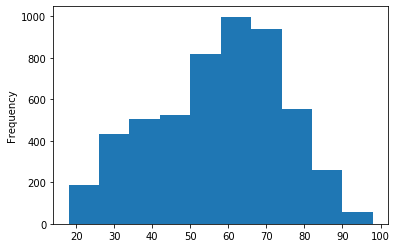

In [9]:
data['age'] = data['age'].astype('int32')
data['age'].plot(kind= 'hist')

Next, I am going to select predictors that are related to my research.

In [10]:
HINTS = data[['everhadcancer','age','maritalstatus', 'education', 'race','genderc', 'whereseekhealthinfo','strongneedhealthinfo','seekcancerinfo','trustdoctor','trustfamily','trustgov', 'trustcharities','trustreligiousorgs']]
HINTS = HINTS[(HINTS['everhadcancer'] == 'Yes') | (HINTS['everhadcancer'] == 'No')]
outcome = HINTS['everhadcancer']
HINTS = HINTS.drop(['everhadcancer'], axis = 1)
#replace missing to unknown
HINTS = HINTS.replace(['Missing data (Filter Missing)','Missing data (Not Ascertained)', 'Missing data (Web partial - Question Never Seen)', 'Multiple responses selected in error', 'Inapplicable, coded 2 in SeekHealthInfo', 'Question answered in error (Commission Error)'], value = 'Unknown')
#HINTS.head(5)
#clean a bit for the information source
HINTS['whereseekhealthinfo']=HINTS['whereseekhealthinfo'].replace(['Brochures, pamphlets, etc.', 'Telephone information number','Complementary, alternative, or unconventional practitioner'],value = 'others')
HINTS['whereseekhealthinfo']=HINTS['whereseekhealthinfo'].replace(['Books','Magazines', 'Newspapers', 'Library'], value = 'paper-based publications and library')

In [11]:
#standardize age
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
col = ['age']
new_numeric = scaler.fit_transform(HINTS[col])
HINTS['age'] = new_numeric

In [12]:
HINTS = pd.get_dummies(HINTS, drop_first = True)
HINTS.head(5)

,age,maritalstatus_Living as married or living with a romantic partner,maritalstatus_Married,maritalstatus_Separated,"maritalstatus_Single, never been married",maritalstatus_Unknown,maritalstatus_Widowed,education_8 through 11 years,education_College graduate,education_Less than 8 years,education_Post high school training other than college (vocational or technical),education_Postgraduate,education_Some college,education_Unknown,race_black (not latino),race_latino,race_others,race_unknown,race_white (not latino),genderc_Male,genderc_Unknown,whereseekhealthinfo_Doctor or health care provider,whereseekhealthinfo_Family,whereseekhealthinfo_Friend/Co-worker,whereseekhealthinfo_Internet,whereseekhealthinfo_Unknown,whereseekhealthinfo_others,whereseekhealthinfo_paper-based publications and library,"strongneedhealthinfo_Brochures, pamphlets, etc.",strongneedhealthinfo_Cancer organization,"strongneedhealthinfo_Complementary, alternative, or unconventional practitioner",strongneedhealthinfo_Doctor or health care provider,strongneedhealthinfo_Family,strongneedhealthinfo_Friend/Co-worker,strongneedhealthinfo_Internet,strongneedhealthinfo_Library,strongneedhealthinfo_Magazines,strongneedhealthinfo_Newspapers,strongneedhealthinfo_Other - Specify:,strongneedhealthinfo_Telephone information number,strongneedhealthinfo_Unknown,seekcancerinfo_Unknown,seekcancerinfo_Yes,trustdoctor_A lot,trustdoctor_Not At All,trustdoctor_Some,trustdoctor_Unknown,trustfamily_A lot,trustfamily_Not At All,trustfamily_Some,trustfamily_Unknown,trustgov_A lot,trustgov_Not At All,trustgov_Some,trustgov_Unknown,trustcharities_A lot,trustcharities_Not At All,trustcharities_Some,trustcharities_Unknown,trustreligiousorgs_A lot,trustreligiousorgs_Not At All,trustreligiousorgs_Some,trustreligiousorgs_Unknown
0,0.828316,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,-0.596611,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
3,0.472084,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-0.715355,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
5,0.768944,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1


In [13]:
#check there's no missing
HINTS.isnull().sum().sum()

0

In [14]:
HINTS.shape

(5236, 63)

In [15]:
#imbalanced data with 84% No and 16% Yes
outcome.value_counts()/outcome.count()

No                                                  0.838235
Yes                                                 0.161765
Missing data (Web partial - Question Never Seen)    0.000000
Missing data (Not Ascertained)                      0.000000
Name: everhadcancer, dtype: float64

In [16]:
#label encode the outcome: 0 no 1 yes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
outcome = le.fit_transform(outcome)

In [17]:
outcome

array([0, 0, 0, ..., 0, 0, 0])

Before modeling, I want to know more about the difference between two groups. So I will conduct the $X^2$ test between cancer vs. no cancer.

In [18]:
from scipy.stats import chi2_contingency, ttest_ind
HINTS_test = data[['everhadcancer','age','maritalstatus', 'education', 'race','genderc', 'whereseekhealthinfo','strongneedhealthinfo','seekcancerinfo','trustdoctor','trustfamily','trustgov', 'trustcharities','trustreligiousorgs']]
HINTS_test = HINTS_test[(HINTS_test['everhadcancer'] == 'Yes') | (HINTS_test['everhadcancer'] == 'No')]

test_table = pd.crosstab(HINTS_test['everhadcancer'],HINTS_test['whereseekhealthinfo'])
test_array = np.array(test_table)

chi2, p, dof, ex  = chi2_contingency(test_array)
print('chi2', chi2, 'p-value ', f'{p:.10f}')

chi2 62.97295687252278 p-value  0.0000001639


In [19]:
# how about gender?
test_table1 = pd.crosstab(HINTS_test['everhadcancer'],HINTS_test['genderc'])
test_array1 = np.array(test_table1)

chi2, p, dof, ex  = chi2_contingency(test_array1)
print('chi2', chi2, 'p-value ', f'{p:.10f}')

chi2 2.1666455508444624 p-value  0.3384689986


In [20]:
# how about marital status?
test_table2 = pd.crosstab(HINTS_test['everhadcancer'],HINTS_test['maritalstatus'])
test_array2 = np.array(test_table2)

chi2, p, dof, ex  = chi2_contingency(test_array2)
print('chi2', chi2, 'p-value ', f'{p:.10f}')

chi2 99.74507334768542 p-value  0.0000000000


In [21]:
# how about age? Very significant between groups

t_statistics, t_p_value = ttest_ind(HINTS_test['age'][HINTS_test['everhadcancer'] =='Yes'], HINTS_test['age'][HINTS_test['everhadcancer'] =='No'])
print('t_statistics', t_statistics, 'p_value', f'{t_p_value: .10f}')

t_statistics 21.900008136763965 p_value  0.0000000000


### Modeling - Logit

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(HINTS, outcome, test_size = 0.2, random_state = 123)

import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
sm_x_train = sm.add_constant(x_train, prepend=False)
sm_logit_model = sm.Logit(y_train, sm_x_train)
# use the regurlization to eliminate collinear predictors
sm_result = sm_logit_model.fit_regularized()

dfoutput = summary_col(sm_result,stars=True)
print(dfoutput)

/Users/Szu-MinYu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.35024944552720627
            Iterations: 496
            Function evaluations: 497
            Gradient evaluations: 496

                                                                                     y     
-------------------------------------------------------------------------------------------
age                                                                              1.0377*** 
                                                                                 (0.0691)  
maritalstatus_Living as married or living with a romantic partner                0.0219    
                                                                                 (0.2654)  
maritalstatus_Married                                                            -0.3677***
                                                                                 (0.1297)  
maritalstatus_Separated                         

In [24]:
#sklearn

from sklearn.linear_model import LogisticRegressionCV
logit = LogisticRegressionCV(cv = 5, class_weight = 'balanced', max_iter = 500)
logit_model = logit.fit(x_train, y_train)
y_pred = logit_model.predict(x_train)

from sklearn.metrics import classification_report
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81      2669
           1       0.76      0.33      0.46      1519

    accuracy                           0.72      4188
   macro avg       0.73      0.64      0.64      4188
weighted avg       0.73      0.72      0.68      4188



### Modeling - Random Forest

In [25]:
#random forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight = 'balanced')
rfc_model = rfc.fit(x_train, y_train)
y_pred_rfc = rfc_model.predict(x_train)

print(classification_report(y_pred_rfc, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3520
           1       1.00      1.00      1.00       668

    accuracy                           1.00      4188
   macro avg       1.00      1.00      1.00      4188
weighted avg       1.00      1.00      1.00      4188



In [26]:
## what are the important features?

pd.DataFrame(data = {'feature_importance':rfc_model.feature_importances_}, index = HINTS.columns).sort_values(by = 'feature_importance', ascending = False)[:30]

,feature_importance
age,0.252936
seekcancerinfo_Yes,0.071742
genderc_Male,0.030618
trustfamily_Some,0.028187
trustgov_Some,0.027089
trustreligiousorgs_Not At All,0.026474
maritalstatus_Married,0.026072
trustcharities_Some,0.025890
education_Some college,0.024659
race_white (not latino),0.024358


### modeling conclusion:

RF did a great job classify observations!

From the importance table, age, seeking cancer info, and gender are playing essential roles in classifying the data.

## Patient segmentation

In [27]:
HINTS_clustering = data[['everhadcancer','age','maritalstatus', 'education', 'race','genderc', 'whereseekhealthinfo','strongneedhealthinfo','seekcancerinfo','trustdoctor','trustfamily','trustgov', 'trustcharities','trustreligiousorgs']]
HINTS_clustering = HINTS_clustering[(HINTS_clustering['everhadcancer'] == 'Yes')]
HINTS_clustering = HINTS_clustering.drop(['everhadcancer'], axis = 1)

#replace missing to unknown
HINTS_clustering = HINTS_clustering.replace(['Missing data (Filter Missing)','Missing data (Not Ascertained)', 'Missing data (Web partial - Question Never Seen)', 'Multiple responses selected in error', 'Inapplicable, coded 2 in SeekHealthInfo', 'Question answered in error (Commission Error)'], value = 'Unknown')
#HINTS.head(5)

scaler = StandardScaler()
col = ['age']
new_numeric = scaler.fit_transform(HINTS_clustering[col])
HINTS_clustering['age'] = new_numeric

HINTS_clustering = pd.get_dummies(HINTS_clustering, drop_first = True)
HINTS_clustering.head(5)

,age,maritalstatus_Living as married or living with a romantic partner,maritalstatus_Married,maritalstatus_Separated,"maritalstatus_Single, never been married",maritalstatus_Unknown,maritalstatus_Widowed,education_8 through 11 years,education_College graduate,education_Less than 8 years,education_Post high school training other than college (vocational or technical),education_Postgraduate,education_Some college,education_Unknown,race_black (not latino),race_latino,race_others,race_unknown,race_white (not latino),genderc_Male,genderc_Unknown,"whereseekhealthinfo_Brochures, pamphlets, etc.",whereseekhealthinfo_Cancer organization,whereseekhealthinfo_Doctor or health care provider,whereseekhealthinfo_Family,whereseekhealthinfo_Friend/Co-worker,whereseekhealthinfo_Internet,whereseekhealthinfo_Library,whereseekhealthinfo_Magazines,whereseekhealthinfo_Newspapers,whereseekhealthinfo_Telephone information number,whereseekhealthinfo_Unknown,"strongneedhealthinfo_Brochures, pamphlets, etc.",strongneedhealthinfo_Cancer organization,"strongneedhealthinfo_Complementary, alternative, or unconventional practitioner",strongneedhealthinfo_Doctor or health care provider,strongneedhealthinfo_Family,strongneedhealthinfo_Friend/Co-worker,strongneedhealthinfo_Internet,strongneedhealthinfo_Library,strongneedhealthinfo_Magazines,strongneedhealthinfo_Other - Specify:,strongneedhealthinfo_Telephone information number,strongneedhealthinfo_Unknown,seekcancerinfo_Unknown,seekcancerinfo_Yes,trustdoctor_A lot,trustdoctor_Not At All,trustdoctor_Some,trustdoctor_Unknown,trustfamily_A lot,trustfamily_Not At All,trustfamily_Some,trustfamily_Unknown,trustgov_A lot,trustgov_Not At All,trustgov_Some,trustgov_Unknown,trustcharities_A lot,trustcharities_Not At All,trustcharities_Some,trustcharities_Unknown,trustreligiousorgs_A lot,trustreligiousorgs_Not At All,trustreligiousorgs_Some,trustreligiousorgs_Unknown
5,0.149785,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
17,0.231059,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
18,-0.662952,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
24,0.312333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,-1.638236,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0


In [28]:
# modeling
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 123).fit(np.array(HINTS_clustering))

In [29]:
kmeans.n_iter_

22

In [30]:
HINTS_clustering['cluster_group'] = kmeans.labels_

In [31]:
HINTS_clustering['cluster_group'].value_counts()

2    353
1    313
0    181
Name: cluster_group, dtype: int64

In [32]:
## some unknowns
HINTS_clustering['seekcancerinfo_Unknown'].sum()

22

Let's check the group 0 and crosstabs.

In [101]:
HINTS_clustering[HINTS_clustering['cluster_group'] == 0]

,age,maritalstatus_Living as married or living with a romantic partner,maritalstatus_Married,maritalstatus_Separated,"maritalstatus_Single, never been married",maritalstatus_Unknown,maritalstatus_Widowed,education_8 through 11 years,education_College graduate,education_Less than 8 years,education_Post high school training other than college (vocational or technical),education_Postgraduate,education_Some college,education_Unknown,race_black (not latino),race_latino,race_others,race_unknown,race_white (not latino),genderc_Male,genderc_Unknown,"whereseekhealthinfo_Brochures, pamphlets, etc.",whereseekhealthinfo_Cancer organization,whereseekhealthinfo_Doctor or health care provider,whereseekhealthinfo_Family,whereseekhealthinfo_Friend/Co-worker,whereseekhealthinfo_Internet,whereseekhealthinfo_Library,whereseekhealthinfo_Magazines,whereseekhealthinfo_Newspapers,whereseekhealthinfo_Telephone information number,whereseekhealthinfo_Unknown,"strongneedhealthinfo_Brochures, pamphlets, etc.",strongneedhealthinfo_Cancer organization,"strongneedhealthinfo_Complementary, alternative, or unconventional practitioner",strongneedhealthinfo_Doctor or health care provider,strongneedhealthinfo_Family,strongneedhealthinfo_Friend/Co-worker,strongneedhealthinfo_Internet,strongneedhealthinfo_Library,strongneedhealthinfo_Magazines,strongneedhealthinfo_Other - Specify:,strongneedhealthinfo_Telephone information number,strongneedhealthinfo_Unknown,seekcancerinfo_Unknown,seekcancerinfo_Yes,trustdoctor_A lot,trustdoctor_Not At All,trustdoctor_Some,trustdoctor_Unknown,trustfamily_A lot,trustfamily_Not At All,trustfamily_Some,trustfamily_Unknown,trustgov_A lot,trustgov_Not At All,trustgov_Some,trustgov_Unknown,trustcharities_A lot,trustcharities_Not At All,trustcharities_Some,trustcharities_Unknown,trustreligiousorgs_A lot,trustreligiousorgs_Not At All,trustreligiousorgs_Some,trustreligiousorgs_Unknown,cluster_group
31,-1.638236,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
34,-1.882057,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
38,-1.313141,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
180,-0.988046,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
276,-1.150594,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
295,-0.744225,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
302,-1.313141,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0
332,-1.882057,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
344,-1.231868,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
353,-1.882057,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [102]:
def pivot(data, column):
    df = data.groupby('cluster_group')[column].value_counts().unstack()
    df = df.div(df.sum(axis = 1), axis = 0)
    df.index = ['Group 1', 'Group 2', 'Group 3']
    return df

In [124]:
HINTS_cluster = data[['everhadcancer','age','maritalstatus', 'education', 'race','genderc', 'whereseekhealthinfo','strongneedhealthinfo','seekcancerinfo','trustdoctor','trustfamily','trustgov', 'trustcharities','trustreligiousorgs']]
HINTS_cluster = HINTS_cluster.merge(HINTS_clustering['cluster_group'], how = 'inner', left_index = True, right_index = True)
pivot(HINTS_cluster, 'maritalstatus')


maritalstatus,Divorced,Living as married or living with a romantic partner,Married,Missing data (Not Ascertained),Multiple responses selected in error,Separated,"Single, never been married",Widowed
Group 1,0.204420,0.055249,0.392265,0.005525,NaN,0.038674,0.232044,0.071823
Group 2,0.182109,0.025559,0.309904,NaN,0.003195,0.019169,0.070288,0.389776
Group 3,0.189802,0.028329,0.645892,0.002833,NaN,0.014164,0.048159,0.070822


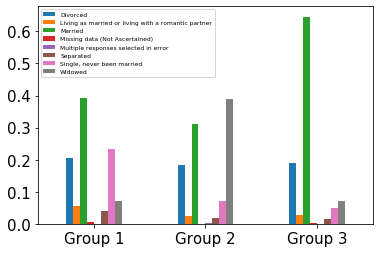

In [126]:
table = pivot(HINTS_cluster, 'maritalstatus')
table.plot.bar(rot = 0)
plt.legend(loc=2, prop={'size': 6})

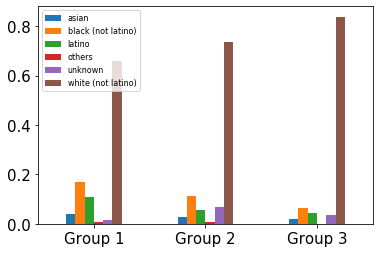

In [130]:
table1 = pivot(HINTS_cluster, 'race')
table1.plot.bar(rot = 0)
plt.legend(loc=2, prop={'size': 8})

## Within cancer patient classification

Within patients who have cancer, I am going to dig deeper into the information source they seek.

In [78]:
#get data - filter out missing

info_clustering = HINTS_clustering[HINTS_clustering['seekcancerinfo_Unknown'] != 1]

#now it's 825 people with YES or NO for seeking cancer information

info_clustering_outcome = info_clustering['seekcancerinfo_Yes']
info_clustering = info_clustering.drop(['seekcancerinfo_Unknown','seekcancerinfo_Yes', 'cluster_group'], axis = 1)

#also, drop the columns about whether

#imbalanced outcome
info_clustering_outcome.astype('category').value_counts()/info_clustering_outcome.astype('category').count()

1    0.804848
0    0.195152
Name: seekcancerinfo_Yes, dtype: float64

In [79]:
# train test split 

x_train1, x_test1, y_train1, y_test1 = train_test_split(info_clustering, info_clustering_outcome, test_size = 0.2, random_state = 123)

#fit logit
x_train1_sm = sm.add_constant(x_train1, prepend = False)
logit_model1 = sm.Logit(y_train1, x_train1_sm)
logit_model1_result = logit_model1.fit_regularized()
print(summary_col(logit_model1_result, stars = True))

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.


Iteration limit exceeded    (Exit mode 9)
            Current function value: 0.14314116258144102
            Iterations: 1001
            Function evaluations: 10942
            Gradient evaluations: 1001

                                                                                 seekcancerinfo_Yes
---------------------------------------------------------------------------------------------------
age                                                                              -0.1093           
                                                                                 (0.1350)          
maritalstatus_Living as married or living with a romantic partner                0.0072            
                                                                                 (0.6487)          
maritalstatus_Married                                                            0.2534            
                                                                                 (0.3157)    

Maximum Likelihood optimization failed to converge. Check mle_retvals


In [80]:
y_pred_sm = logit_model1_result.predict(x_train1_sm)
y_pred_choice = (y_pred_sm > 0.5).astype(int)
print(classification_report(y_pred_choice, y_train1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.79      0.88       660

    accuracy                           0.79       660
   macro avg       0.50      0.39      0.44       660
weighted avg       1.00      0.79      0.88       660



Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [81]:
## fit Random Forest

clf = RandomForestClassifier(class_weight = 'balanced')
clf_model = clf.fit(x_train1, y_train1)
y_pred1 = clf_model.predict(x_train1)
print(classification_report(y_pred1, y_train1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       520

    accuracy                           1.00       660
   macro avg       1.00      1.00      1.00       660
weighted avg       1.00      1.00      1.00       660



Accuracy is 1. Nice

In [82]:
feature_importance_table = pd.DataFrame({'feature_importance': clf.feature_importances_}, index = info_clustering.columns).sort_values(by = 'feature_importance', ascending = False)
feature_importance_table.head(10)

#with pd.ExcelWriter('feature.xlsx') as writer:
#    feature_importance_table.to_excel(writer, 'feature_importance')

,feature_importance
age,0.145324
whereseekhealthinfo_Unknown,0.075665
whereseekhealthinfo_Internet,0.047980
genderc_Male,0.032401
trustfamily_Some,0.031786
trustgov_Some,0.031153
trustreligiousorgs_Not At All,0.029828
strongneedhealthinfo_Doctor or health care provider,0.028588
education_Some college,0.028404
education_College graduate,0.028260


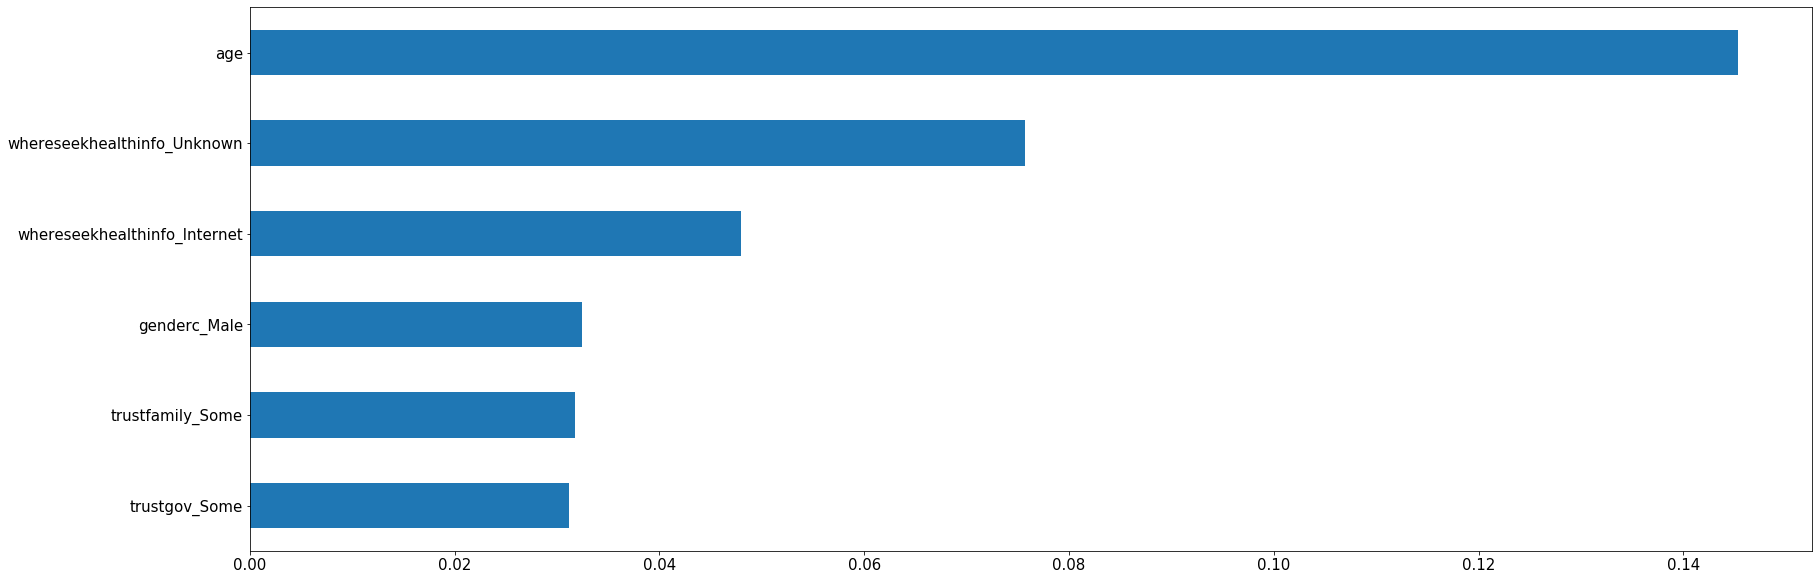

In [83]:
font = {'size'   : 15}

plt.rc('font', **font)
plt.figure(figsize=(28,10))
feature_importance_table['feature_importance'].head(6).sort_values(ascending = True).plot('barh')
plt.savefig('feature.png')

SHAP TIME: I am going to use SHAP to understand the result from RF more

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


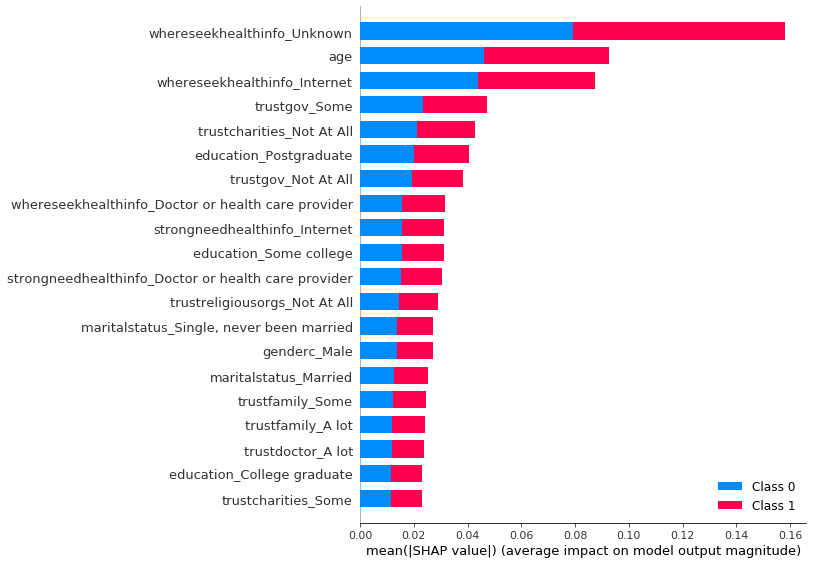

In [84]:
import shap

shap_values = shap.TreeExplainer(clf_model).shap_values(x_train1)
shap.summary_plot(shap_values, x_train1, plot_type = 'bar')

In [85]:
#X_rand = x_test1.sample(1, random_state = 5)
X_rand = x_test1[x_test1.index == 5084]

HINTS_shap = data[['everhadcancer','age','maritalstatus', 'education', 'race','genderc', 'whereseekhealthinfo','strongneedhealthinfo','seekcancerinfo','trustdoctor','trustfamily','trustgov', 'trustcharities','trustreligiousorgs']]
display(HINTS_shap[HINTS_shap.index == 5084])

#prediction
rand_pred = clf_model.predict(X_rand)
rand_proba = clf_model.predict_proba(X_rand)


print(f'Predicted Proba (no, yes): {rand_proba}')
print(f'Predicted Yes No: {rand_pred}', '\n')

,everhadcancer,age,maritalstatus,education,race,genderc,whereseekhealthinfo,strongneedhealthinfo,seekcancerinfo,trustdoctor,trustfamily,trustgov,trustcharities,trustreligiousorgs
5084,Yes,56,Divorced,Postgraduate,white (not latino),Female,Internet,Internet,Yes,Some,A little,Some,Some,Not At All


Predicted Proba (no, yes): [[0.12 0.88]]
Predicted Yes No: [1] 



In [100]:
shap.initjs()
explainer = shap.TreeExplainer(clf_model, model_output='probability', feature_perturbation = "interventional", data = x_test1)
shap_values_Model = explainer.shap_values(X_rand)
display(shap.force_plot(explainer.expected_value[1], shap_values_Model[1], X_rand))

In [132]:
display(pd.DataFrame(data=shap_values_Model[1]*100, columns=X_rand.columns, index = [5084]).transpose().sort_values(by = 5084, ascending = False)[:20])

,5084
whereseekhealthinfo_Internet,2.704364
genderc_Male,2.211316
whereseekhealthinfo_Unknown,1.632063
trustgov_Some,0.973365
education_Postgraduate,0.861141
"maritalstatus_Single, never been married",0.744909
trustcharities_Not At All,0.681601
strongneedhealthinfo_Internet,0.517729
trustfamily_Some,0.378982
trustfamily_A lot,0.294064


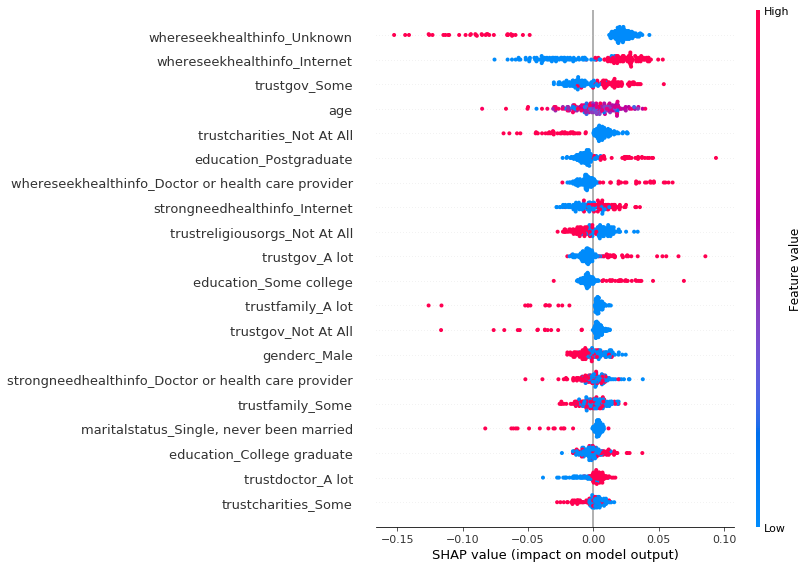

In [95]:
shap_values1 = explainer.shap_values(x_test1)
shap.summary_plot(shap_values1[1], x_test1)

So let's interpret this plot:

1. Seek info on Internet: when the value is low (0) then it has negative association with predicting YES. => searching info use internet is associated with higher probability in searching cancer info.

2. Age: doesn't have clear patter

3. Trust charities: people who do trust charities tend to not search cancer info

4. Seek info from doctor: people who do this tend to search cancer info; same as trust gov 

5. Male: female tend to search cancer info

### Inspect group difference

Once I know what features play essential roles in classifying my outcome (look for info or not), I can start to inspect some detailed differences between two groups: cancer patient who look up cancer information vs. who didn't.

In [199]:
info_clustering1 = info_clustering.merge(info_clustering_outcome, how = 'left', left_index = True, right_index = True)

# t-test for age, significant
t, p = ttest_ind(info_clustering1['age'][info_clustering1['seekcancerinfo_Yes'] == 1], info_clustering1['age'][info_clustering1['seekcancerinfo_Yes'] == 0])
print('t statistics', t, 'p value', f'{p:.10f}')

t statistics -2.352774691295545 p value 0.0188684502


For instance, age is significantly different between two groups.

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


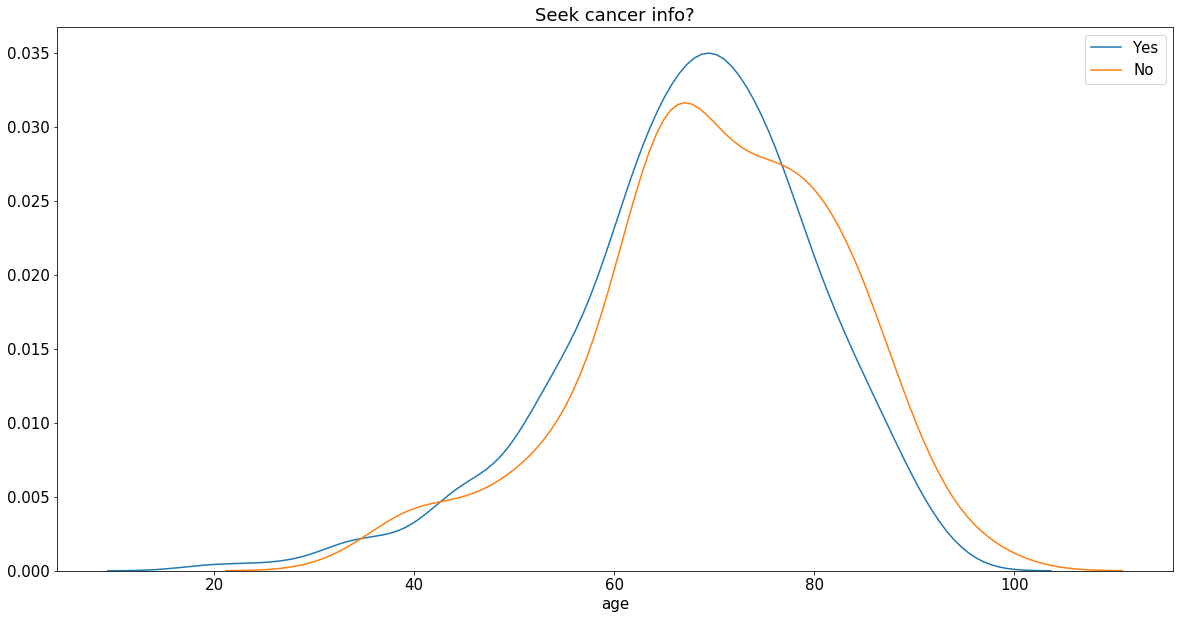

In [269]:
groupa_index = info_clustering1['age'][info_clustering1['seekcancerinfo_Yes'] == 1].index
groupb_index = info_clustering1['age'][info_clustering1['seekcancerinfo_Yes'] == 0].index

#
groupa = data['age'][data.index.isin(groupa_index)]
groupb = data['age'][data.index.isin(groupb_index)]
#
import seaborn as sns
plt.rc('font', **font)
plt.figure(figsize=(20,10))
sns.distplot(groupa, hist=False, rug=False, label = 'Yes')
sns.distplot(groupb, hist=False, rug=False, label = 'No')
plt.title('Seek cancer info?')
plt.legend(loc='upper right')
plt.savefig('seekcancer_age.png')

In [236]:
group_diff = data[['everhadcancer','age','maritalstatus', 'education', 'race','genderc', 'whereseekhealthinfo','strongneedhealthinfo','seekcancerinfo','trustdoctor','trustfamily','trustgov', 'trustcharities','trustreligiousorgs']]
group_diff = group_diff[group_diff.index.isin(info_clustering1.index)]
group_diff = group_diff.replace(['Missing data (Filter Missing)','Missing data (Not Ascertained)', 'Missing data (Web partial - Question Never Seen)', 'Multiple responses selected in error', 'Inapplicable, coded 2 in SeekHealthInfo', 'Question answered in error (Commission Error)'], value = 'Unknown')
group_diff['whereseekhealthinfo'] = group_diff['whereseekhealthinfo'].replace(['Brochures, pamphlets, etc.', 'Telephone information number','Complementary, alternative, or unconventional practitioner'], value = 'others')
group_diff['whereseekhealthinfo'] = group_diff['whereseekhealthinfo'].replace(['Books','Magazines', 'Newspapers', 'Library'], value = 'paper-based publications and library')
group_diff.head(5)

,everhadcancer,age,maritalstatus,education,race,genderc,whereseekhealthinfo,strongneedhealthinfo,seekcancerinfo,trustdoctor,trustfamily,trustgov,trustcharities,trustreligiousorgs
5,Yes,70,"Single, never been married",12 years or completed high school,black (not latino),Female,Unknown,Doctor or health care provider,No,A lot,Unknown,Unknown,Unknown,Unknown
18,Yes,60,Married,Postgraduate,white (not latino),Female,Internet,Internet,Yes,A lot,Some,Some,Some,Some
24,Yes,72,Married,12 years or completed high school,white (not latino),Male,Internet,Doctor or health care provider,Yes,Some,A little,A little,A little,A little
31,Yes,48,Married,College graduate,white (not latino),Female,others,Doctor or health care provider,No,A lot,Some,Some,Some,Some
32,Yes,69,Widowed,Postgraduate,white (not latino),Female,Doctor or health care provider,Internet,Yes,A lot,A little,A little,Some,A little


I output all the pivot tables into excel and put them into power point that we can present to our clients.

In [266]:
def pivot(column):
    df = pd.crosstab(group_diff['seekcancerinfo'], group_diff[column])
    df = df.div(df.sum(axis = 1), axis = 0)
    return df

with pd.ExcelWriter('group_diff_0207_1.xlsx') as writer:
    pivot('maritalstatus').to_excel(writer, sheet_name = 'marital_status')
    pivot('race').to_excel(writer, sheet_name = 'race')
    pivot('education').to_excel(writer, sheet_name = 'education')
    pivot('genderc').to_excel(writer, sheet_name = 'genderc')
    pivot('everhadcancer').to_excel(writer, sheet_name = 'everhadcancer')
    pivot('whereseekhealthinfo').to_excel(writer, sheet_name = 'healthinfo')
    pivot('trustdoctor').to_excel(writer, sheet_name = 'trustdoctor')
    pivot('trustgov').to_excel(writer, sheet_name = 'trustgov')
    pivot('strongneedhealthinfo').to_excel(writer, sheet_name = 'strong_need')
    pivot('seekcancerinfo').to_excel(writer, sheet_name = 'seekcancerinfo')